First few rows of the dataset:
   Gender  Age  Height(cm)  Weight(kg) Family_history Alcohol Junk_food  \
0  Female   42       172.2        82.9             no     low       yes   
1  Female   19       175.3        80.0            yes    none       yes   
2  Female   43       158.3        81.9            yes    none       yes   
3  Female   23       165.0        70.0            yes     low        no   
4    Male   23       169.0        75.0            yes     low       yes   

   Vege_day  Meals_day      Snack Smoking  Water_intake(L) Transportation  \
0         3          3  Sometimes      no             2.72            car   
1         2          1  Sometimes      no             2.65            bus   
2         3          1  Sometimes      no             1.89            car   
3         2          1  Sometimes      no             2.00            bus   
4         3          3  Sometimes      no             2.82            bus   

   Exercise        TV  Income Discipline Cardiovascular

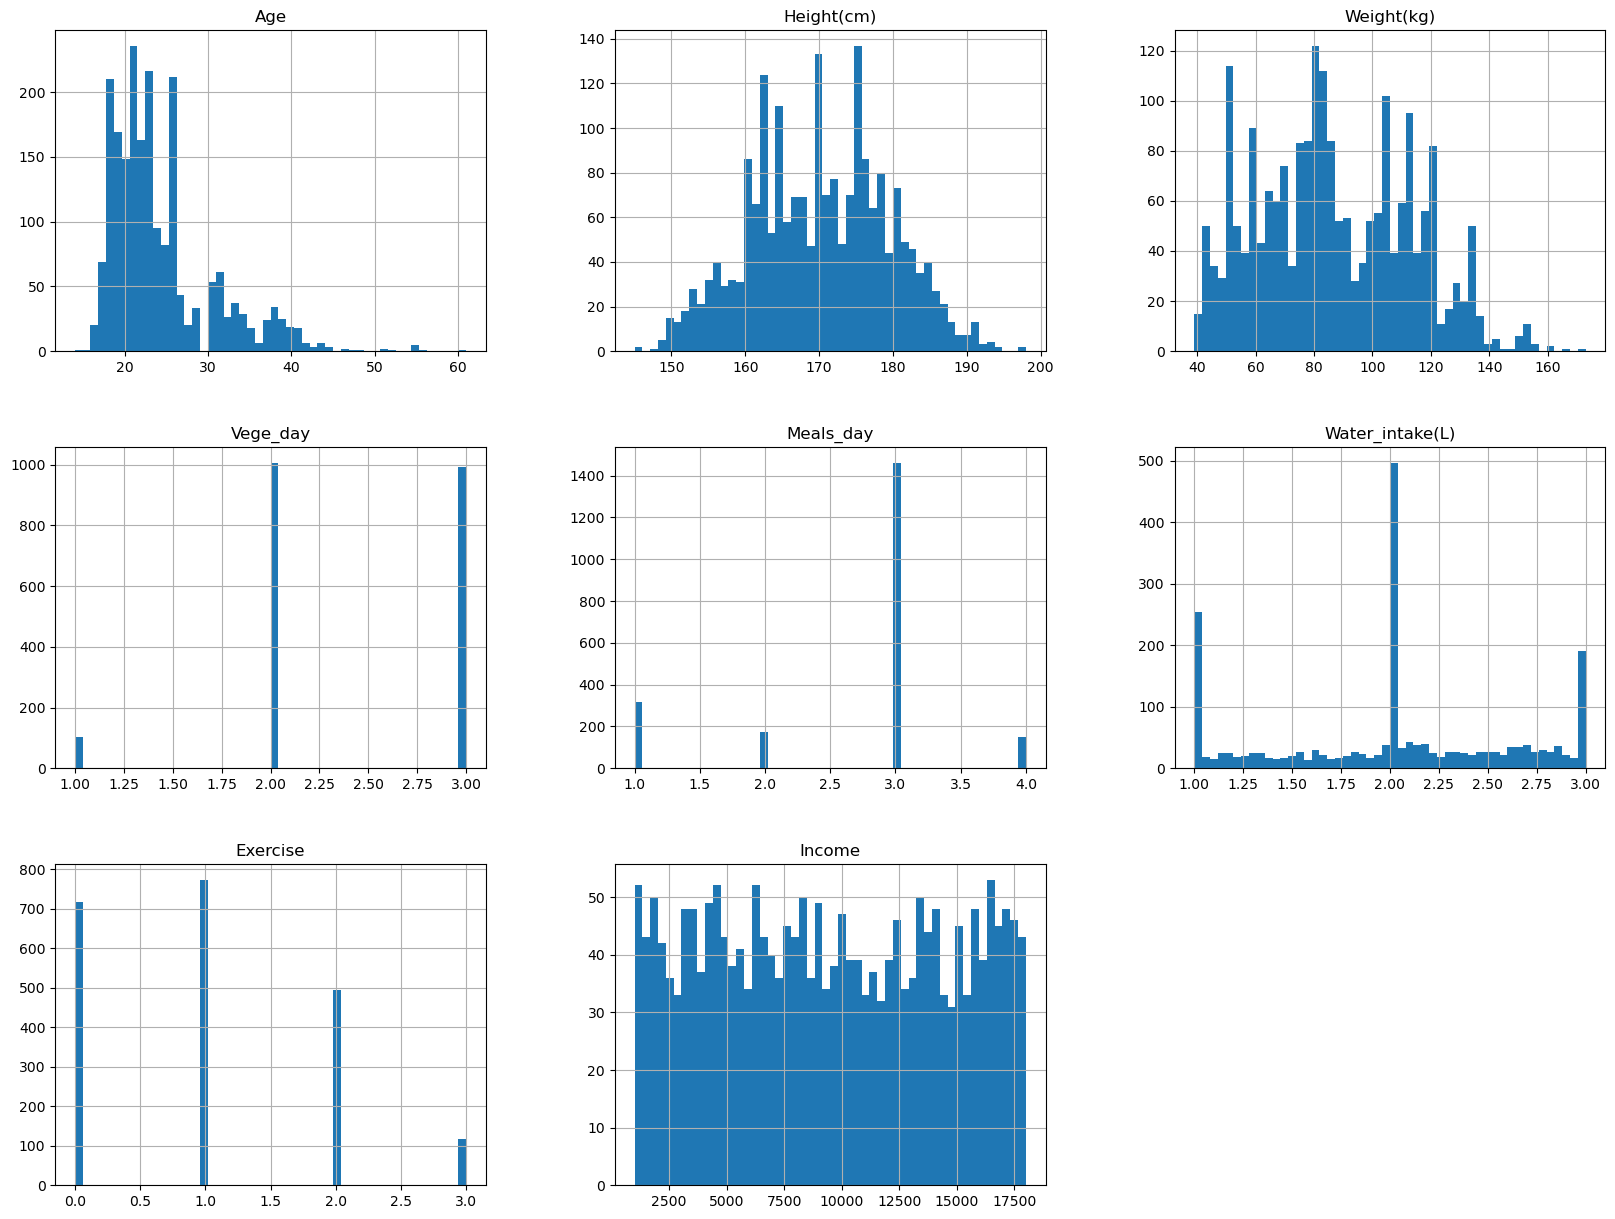


Visualizing distributions of categorical features:


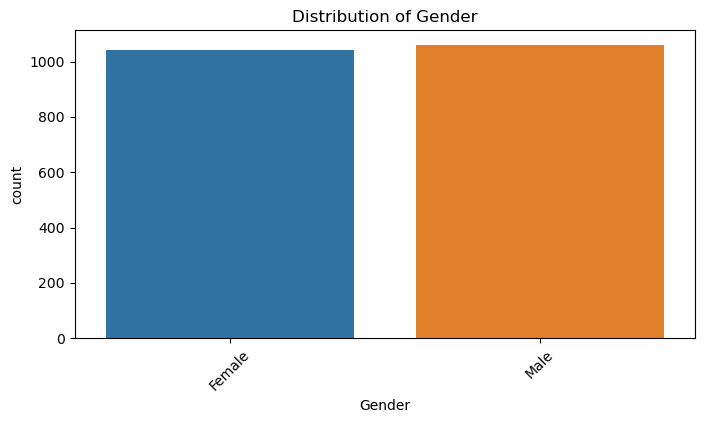

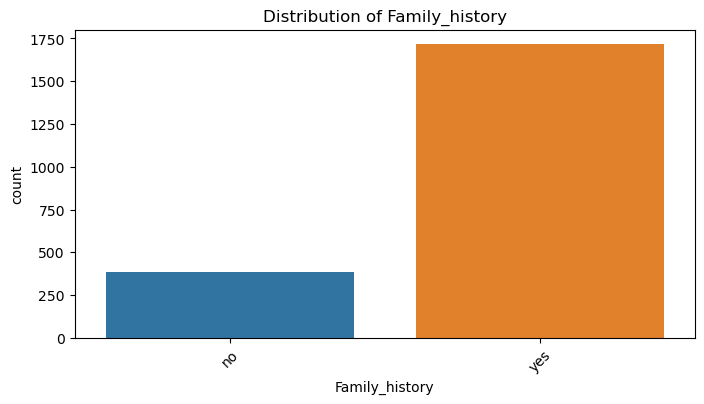

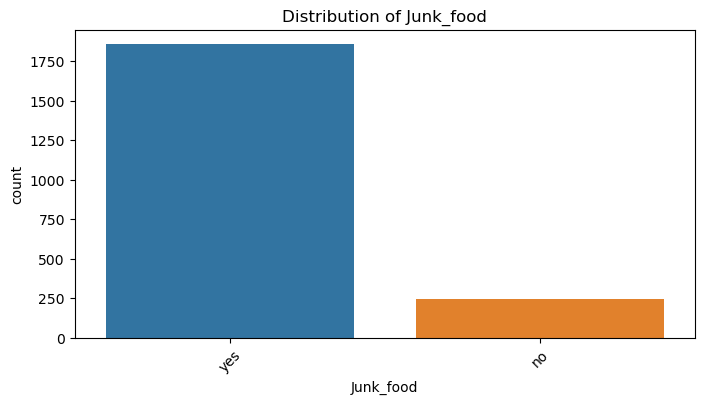

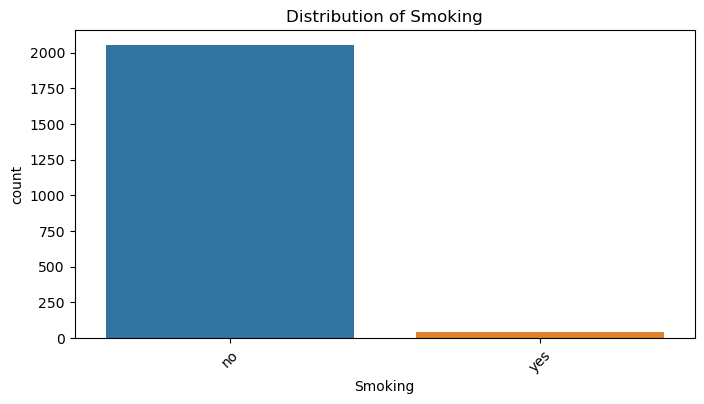

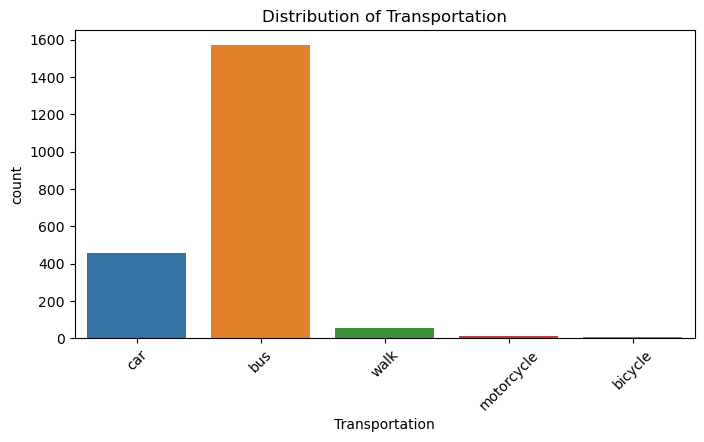

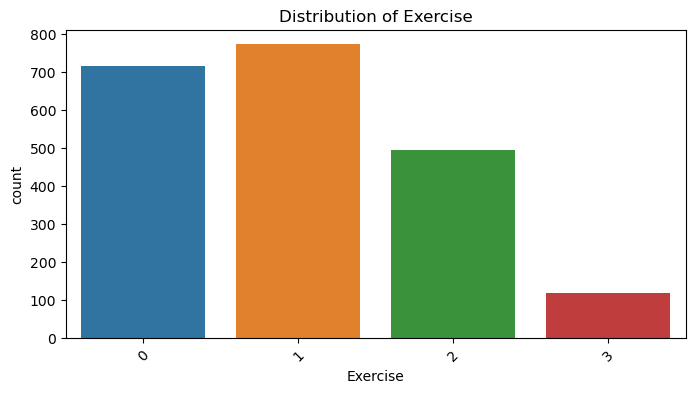

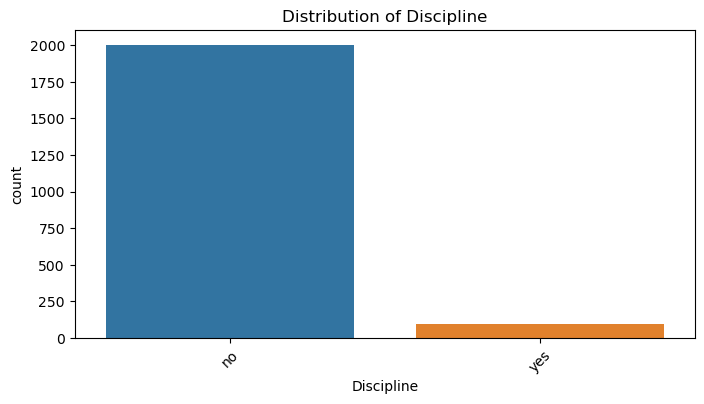


Visualizing distributions of ordinal features:


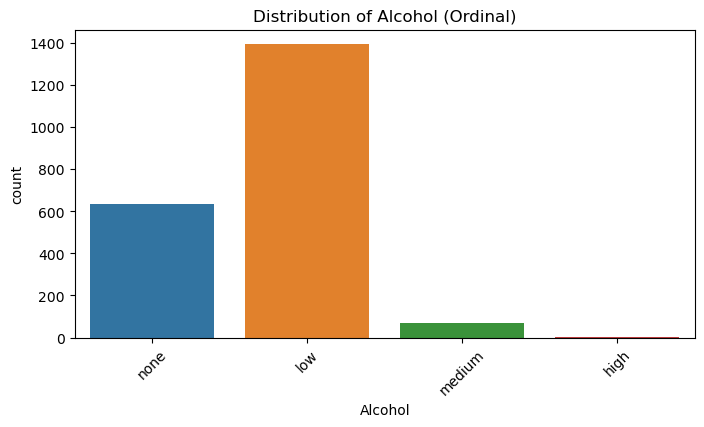

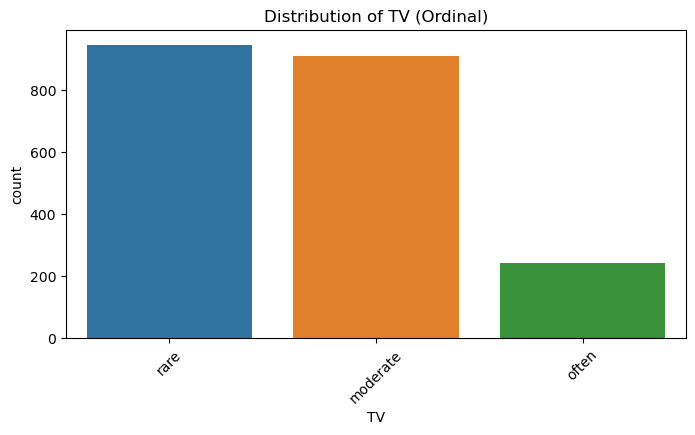

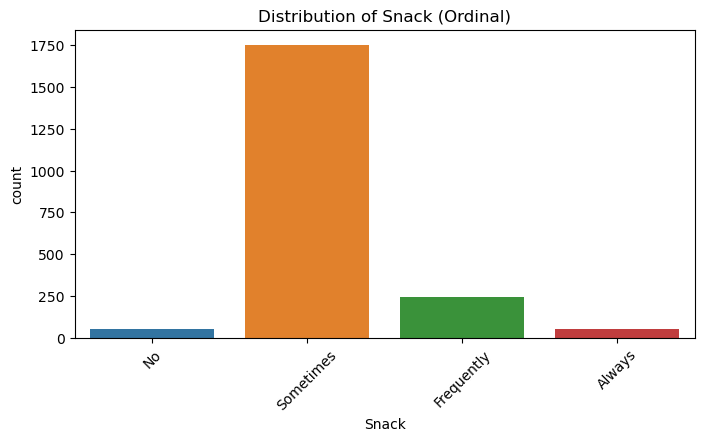


Shape of training data: (1680, 17)
Shape of testing data: (420, 17)

Initial scores before tuning:
RandomForest:
  Training score: 1.0000
  Testing score: 0.9524

LogisticRegression:
  Training score: 0.9845
  Testing score: 0.9690

SGDClassifier:
  Training score: 0.9810
  Testing score: 0.9595



Tuning RandomForest...
Best hyperparameters for RandomForest: {'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best score for RandomForest: 0.9630952380952381



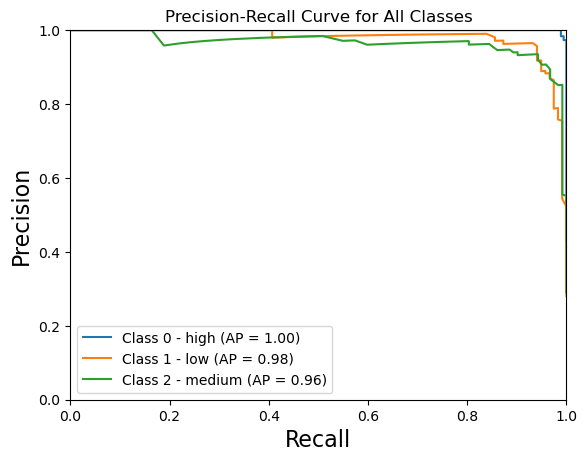

Classification Report for RandomForest:
              precision    recall  f1-score   support

        high       1.00      0.99      0.99       180
         low       0.93      0.94      0.94       118
      medium       0.93      0.93      0.93       122

    accuracy                           0.96       420
   macro avg       0.95      0.95      0.95       420
weighted avg       0.96      0.96      0.96       420

Confusion Matrix for RandomForest:
[[178   0   2]
 [  0 111   7]
 [  0   8 114]]


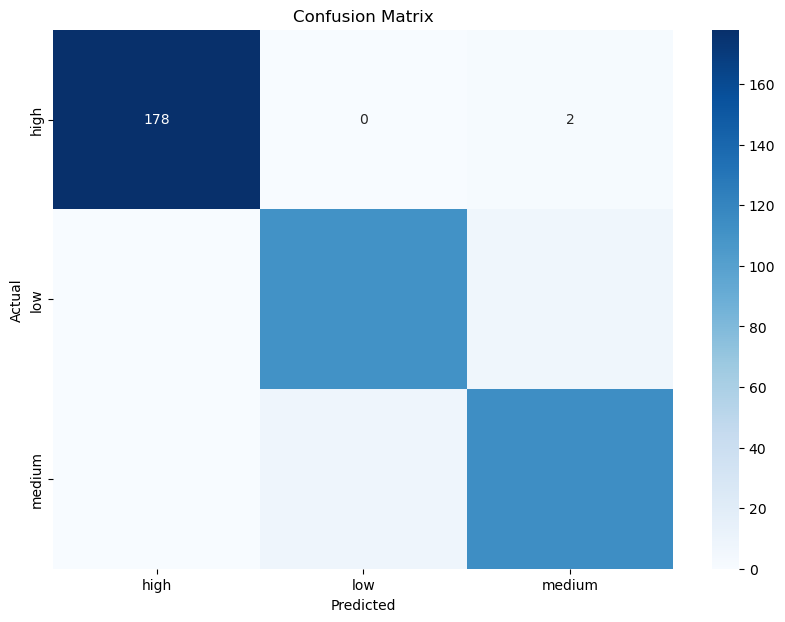

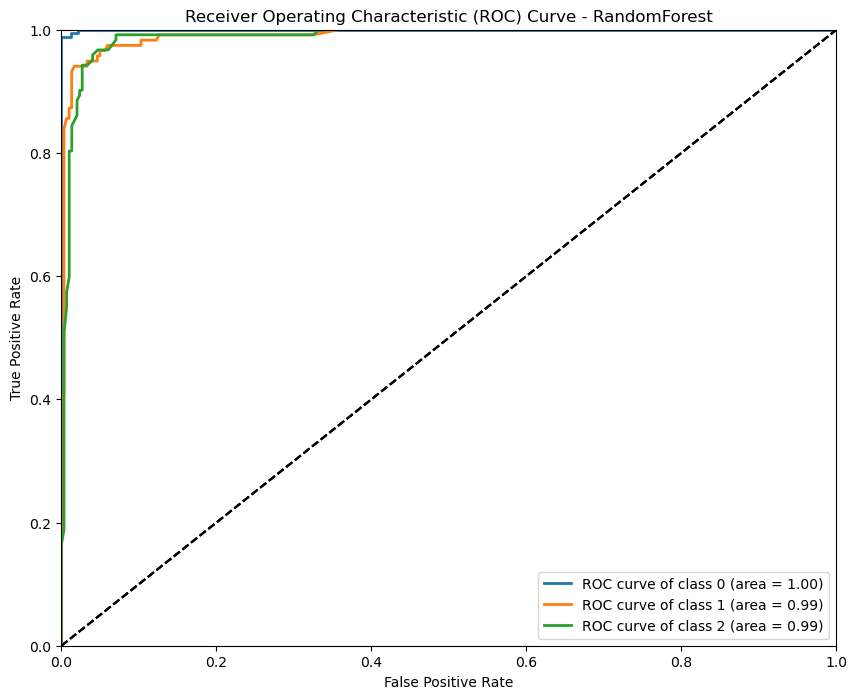

Macro-Averaged ROC AUC Score for RandomForest: 0.9943




Tuning LogisticRegression...
Best hyperparameters for LogisticRegression: {'model__C': 100, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best score for LogisticRegression: 0.9851190476190477



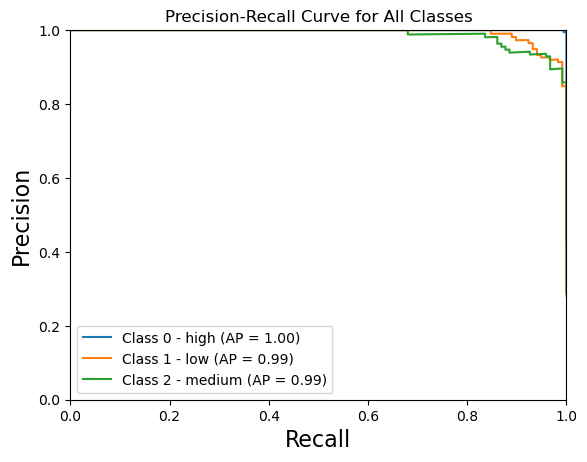

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

        high       0.99      1.00      1.00       180
         low       0.97      0.92      0.95       118
      medium       0.93      0.97      0.95       122

    accuracy                           0.97       420
   macro avg       0.97      0.96      0.96       420
weighted avg       0.97      0.97      0.97       420

Confusion Matrix for LogisticRegression:
[[180   0   0]
 [  0 109   9]
 [  1   3 118]]


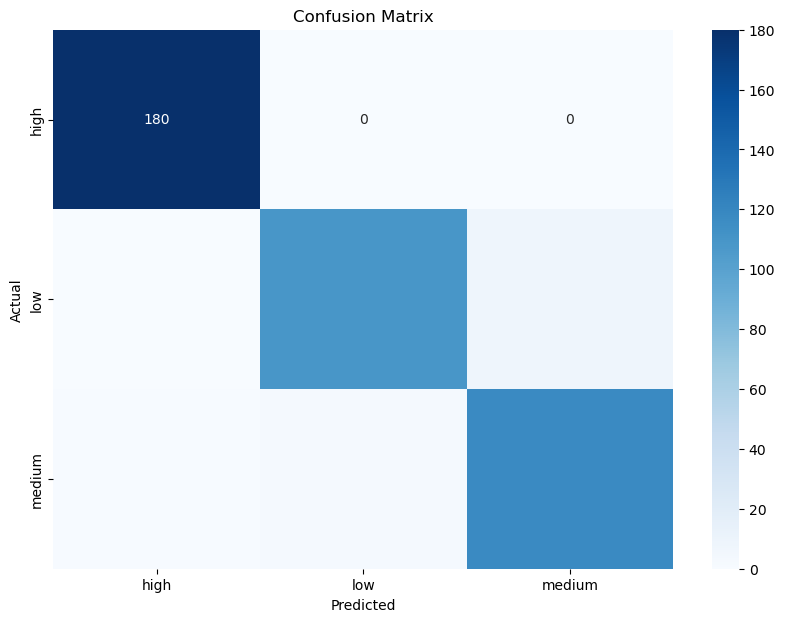

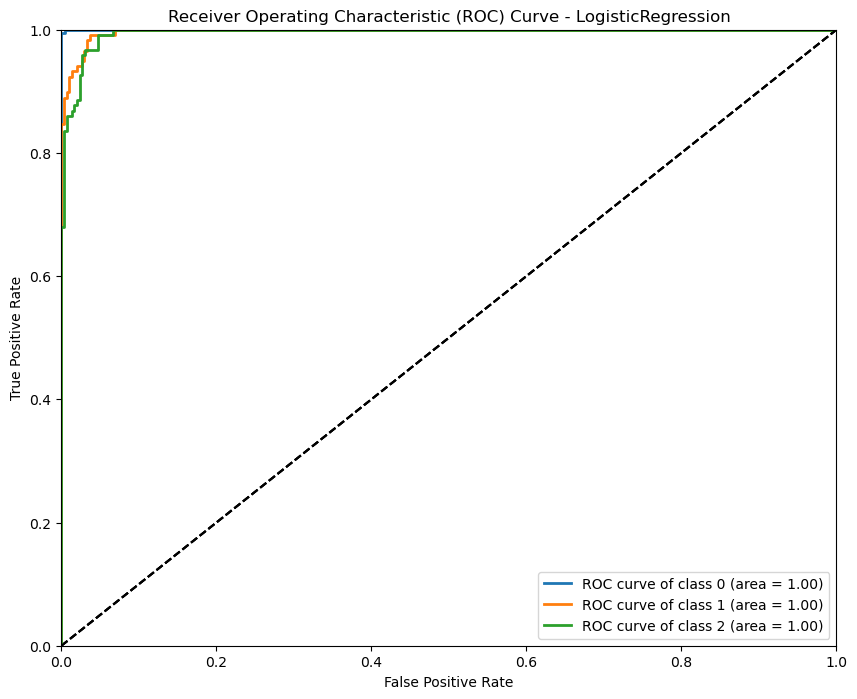

Macro-Averaged ROC AUC Score for LogisticRegression: 0.9981




Tuning SGDClassifier...
Best hyperparameters for SGDClassifier: {'model__alpha': 0.001, 'model__loss': 'modified_huber', 'model__penalty': 'elasticnet'}
Best score for SGDClassifier: 0.9755952380952382



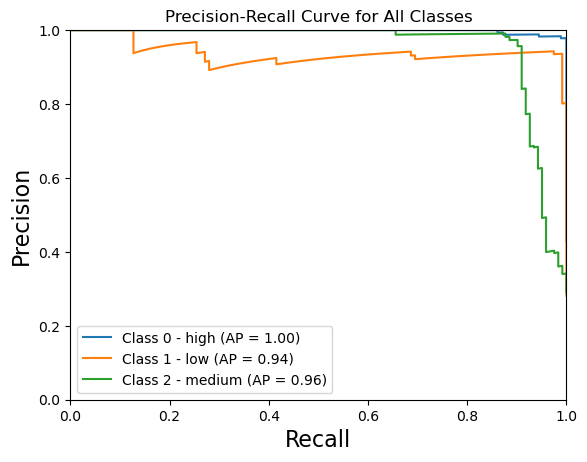

Classification Report for SGDClassifier:
              precision    recall  f1-score   support

        high       0.97      1.00      0.99       180
         low       0.94      0.96      0.95       118
      medium       0.96      0.90      0.93       122

    accuracy                           0.96       420
   macro avg       0.96      0.95      0.95       420
weighted avg       0.96      0.96      0.96       420

Confusion Matrix for SGDClassifier:
[[180   0   0]
 [  0 113   5]
 [  5   7 110]]


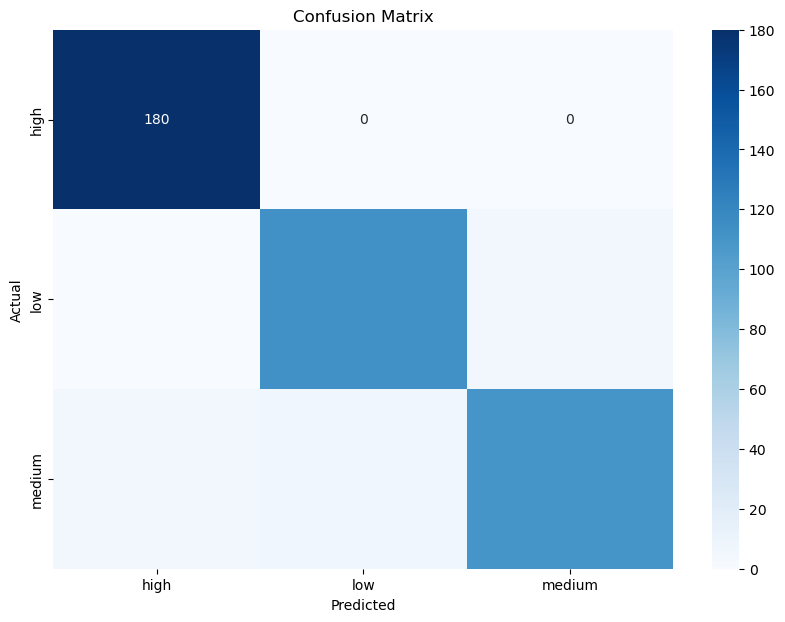

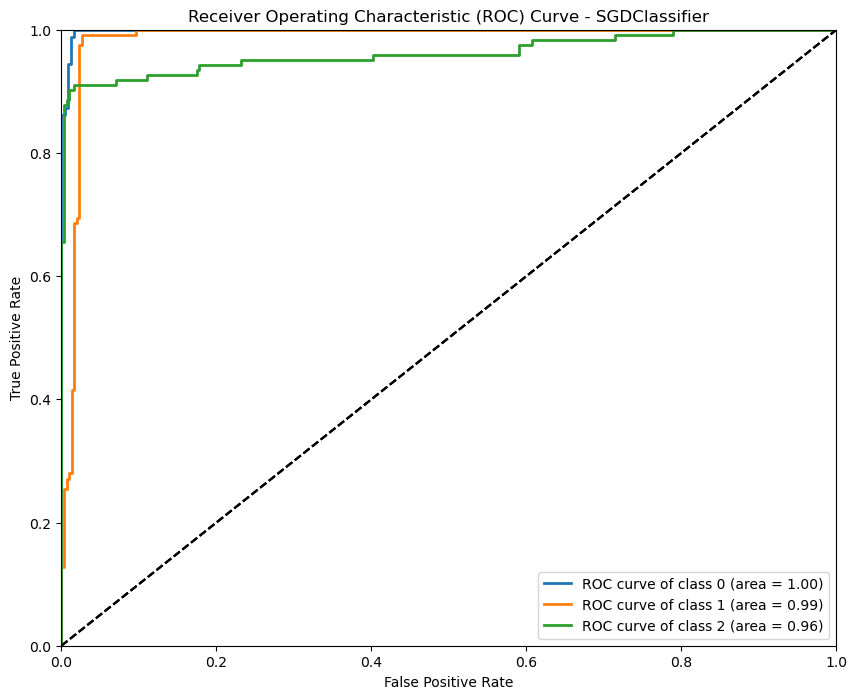

Macro-Averaged ROC AUC Score for SGDClassifier: 0.9898




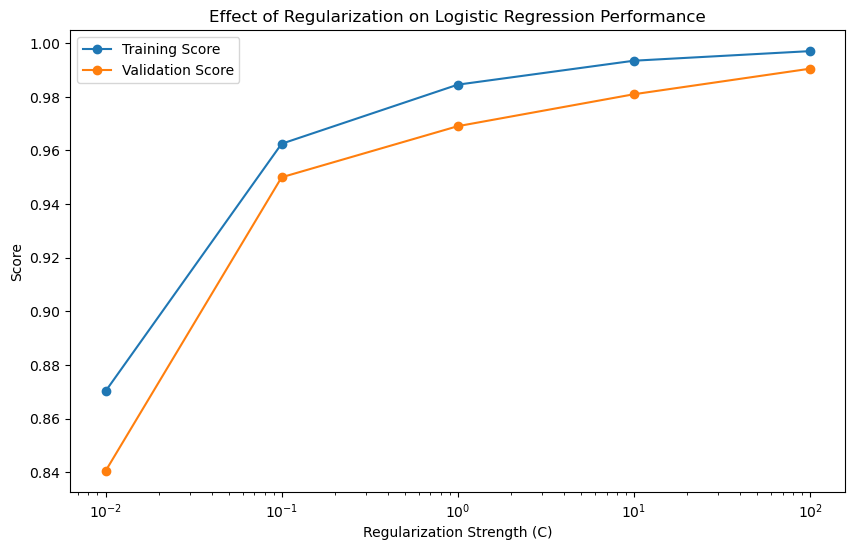

Selected features: ['Height(cm)' 'Weight(kg)' 'Gender_Female' 'Junk_food_yes' 'Snack']
Classification Report with Selected Features:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00       180
         low       0.99      0.96      0.97       118
      medium       0.96      0.99      0.98       122

    accuracy                           0.99       420
   macro avg       0.98      0.98      0.98       420
weighted avg       0.99      0.99      0.99       420

Confusion Matrix with Selected Features:
[[180   0   0]
 [  0 113   5]
 [  0   1 121]]

Cross-validation for RandomForest...
Cross-validation scores for RandomForest: [0.97142857 0.96428571 0.97619048 0.95952381 0.9547619 ]
Mean CV score for RandomForest: 0.9652

Cross-validation for LogisticRegression...
Cross-validation scores for LogisticRegression: [0.98095238 0.96428571 0.97142857 0.97142857 0.96904762]
Mean CV score for LogisticRegression: 0.9714

Cross-validation for SGDClas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score, precision_recall_curve, average_precision_score, accuracy_score, precision_recall_fscore_support
from sklearn.feature_selection import RFE

# =========================================
# Data Exploration
# =========================================
# Load the dataset
df = pd.read_csv('dataset.csv')

print("First few rows of the dataset:")
print(df.head())

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nSummary statistics:")
print(df.describe())

print("\nUnique values in Cardiovascular_risk:")
print(df['Cardiovascular_risk(y)'].value_counts())

# Visualize numerical features
print("\nVisualizing distributions of numerical features:")
df.hist(bins=50, figsize=(20,15))
plt.show()

# Visualize categorical features
print("\nVisualizing distributions of categorical features:")
categorical_features = ['Gender', 'Family_history', 'Junk_food', 'Smoking', 'Transportation', 'Exercise', 'Discipline']
for column in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

# Visualize ordinal features
print("\nVisualizing distributions of ordinal features:")
# Defining the order for the ordinal features
ordinal_features = {
    'Alcohol': ['none', 'low', 'medium', 'high'],
    'TV': ['rare', 'moderate', 'often'],
    'Snack': ['No', 'Sometimes', 'Frequently', 'Always']
}
for column, order in ordinal_features.items():
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=column, order=order)
    plt.title(f'Distribution of {column} (Ordinal)')
    plt.xticks(rotation=45)
    plt.show()


# =========================================
# Data Preprocessing
# =========================================
# Separate features and target variable
X = df.drop('Cardiovascular_risk(y)', axis=1)
y = df['Cardiovascular_risk(y)']

# Identify categorical and numerical features
categorical_features = ['Gender', 'Family_history', 'Junk_food', 'Smoking', 'Transportation', 'Exercise', 'Discipline']
ordinal_features = ['Alcohol', 'TV', 'Snack']
numerical_features = ['Age', 'Height(cm)', 'Weight(kg)', 'Vege_day', 'Meals_day', 'Water_intake(L)', 'Income']

# Define ordinal categories
alcohol_categories = ['none', 'low', 'medium', 'high']
tv_categories = ['rare', 'moderate', 'often']
snack_categories = ['No', 'Sometimes', 'Frequently', 'Always']

# Create preprocessing pipeline
def create_preprocessor(numerical_features, categorical_features, ordinal_features):
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    ordinal_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder(categories=[alcohol_categories, tv_categories, snack_categories]))
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features),
            ('ord', ordinal_transformer, ordinal_features)
        ])

    return preprocessor

preprocessor = create_preprocessor(numerical_features, categorical_features, ordinal_features)

# Fit the preprocessor to the data
preprocessor.fit(X)

# Generate feature names after preprocessing
num_features = len(numerical_features)
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
ord_feature_names = preprocessor.named_transformers_['ord'].named_steps['ordinal'].get_feature_names_out(ordinal_features)
all_feature_names = numerical_features + list(cat_feature_names) + list(ord_feature_names)

# =========================================
# Model Definition
# =========================================
# Create model pipelines
def create_model_pipeline(model, preprocessor):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    return pipeline
    
# When creating pipelines:
pipeline = create_model_pipeline(model, create_preprocessor(numerical_features, categorical_features, ordinal_features))

# Define models
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SGDClassifier': SGDClassifier(loss='log_loss', random_state=42)
}





# =========================================
# Split the dataset
# =========================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nShape of training data: {X_train.shape}")
print(f"Shape of testing data: {X_test.shape}")
print("")

# =========================================
# Hyperparameter Tuning
# =========================================
# Define hyperparameters to tune
param_grids = {
    'RandomForest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'LogisticRegression': {
        'model__penalty': ['l2'],
        'model__C': [0.01, 0.1, 1, 10, 100],
        'model__solver': ['lbfgs', 'liblinear']
    },
    'SGDClassifier': {
        'model__alpha': [0.0001, 0.001, 0.01, 0.1],
        'model__penalty': ['l2', 'elasticnet'],
        'model__loss': ['log_loss', 'modified_huber']
    }
}

# =========================================
# Model Evaluation
# =========================================

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

    
# For each model (RandomForest, LogisticRegression, SGDClassifier):

# =========================================
# Display initial scores before tuning
# =========================================
print("Initial scores before tuning:")
for name, model in models.items():
    pipeline = create_model_pipeline(model, create_preprocessor(numerical_features, categorical_features, ordinal_features))
    pipeline.fit(X_train, y_train)
    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    print(f"{name}:")
    print(f"  Training score: {train_score:.4f}")
    print(f"  Testing score: {test_score:.4f}")
    print()

print("=" * 50)

# Perform GridSearchCV to find the best hyperparameters 
for name, model in models.items():
    print("")
    print("")
    print(f"Tuning {name}...")
    
    param_grid = param_grids[name]
    pipeline = create_model_pipeline(model, create_preprocessor(numerical_features, categorical_features, ordinal_features))
    pipeline.fit(X_train, y_train)
    
    # Use GridSearchCV for exhaustive search
    search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    search.fit(X_train, y_train)
    
    # Best model and hyperparameters
    print(f"Best hyperparameters for {name}: {search.best_params_}")
    print(f"Best score for {name}: {search.best_score_}")
    print("")
    
    # Predict and evaluate with the best model
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)

    # Binarize the target variable
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

    # Compute precision-recall curve for each class
    n_classes = y_test_bin.shape[1]
    for i in range(n_classes):
        precisions, recalls, _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])
        average_precision = average_precision_score(y_test_bin[:, i], y_proba[:, i])
        
        # Plot precision-recall curve
        plt.plot(recalls, precisions, label=f'Class {i} - {["high", "low", "medium"][i]} (AP = {average_precision:.2f})')
    
    # Set plot details
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.title('Precision-Recall Curve for All Classes')
    plt.legend(loc="lower left")
    plt.axis([0, 1, 0, 1])
    plt.show()


    
    # y_pred = search.best_estimator_.predict(X_test)
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix for {name}:\n{confusion_matrix(y_test, y_pred)}")

    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=np.unique(y))

    if hasattr(pipeline.named_steps['model'], 'predict_proba'):
        y_test_bin = label_binarize(y_test, classes=np.unique(y))
        n_classes = y_test_bin.shape[1]
        
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        plt.figure(figsize=(10, 8))
        for i in range(n_classes):
                plot_roc_curve(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
        
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()
        
        # Compute macro-average ROC curve and ROC area
        fpr["macro"], tpr["macro"], _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
        print(f"Macro-Averaged ROC AUC Score for {name}: {roc_auc['macro']:.4f}")
        print("")
        print("")
        
    else:
        print(f"Model {name} does not support probability predictions.")

# =========================================
# Regularization Analysis for Logistic Regression
# =========================================
C_values = [0.01, 0.1, 1, 10, 100]
train_scores = []
val_scores = []

for C in C_values:
    model = LogisticRegression(C=C, max_iter=1000, random_state=42)
    pipeline = create_model_pipeline(model, create_preprocessor(numerical_features, categorical_features, ordinal_features))
    pipeline.fit(X_train, y_train)
    
    # Evaluate performance
    train_score = pipeline.score(X_train, y_train)
    val_score = pipeline.score(X_test, y_test)
    
    train_scores.append(train_score)
    val_scores.append(val_score)

# Plotting Regularization Analysis
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, label='Training Score', marker='o')
plt.plot(C_values, val_scores, label='Validation Score', marker='o')
plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Score')
plt.title('Effect of Regularization on Logistic Regression Performance')
plt.legend()
plt.show()

# =========================================
# Feature Selection with RFE
# =========================================
# Create preprocessor
preprocessor = create_preprocessor(numerical_features, categorical_features, ordinal_features)

# Fit and transform the data
X_transformed = preprocessor.fit_transform(X)

# Define the model and RFE selector
model = LogisticRegression(max_iter=1000, random_state=42)
selector = RFE(model, n_features_to_select=5)

# Fit RFE
selector = RFE(model, n_features_to_select=5)
selector.fit(X_transformed, y)

# Get support mask for selected features
selected_features_mask = selector.support_

# Generate feature names after preprocessing
num_features = len(numerical_features)
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
ord_feature_names = preprocessor.named_transformers_['ord'].named_steps['ordinal'].get_feature_names_out(ordinal_features)
all_feature_names = numerical_features + list(cat_feature_names) + list(ord_feature_names)

# Print selected features
selected_features = np.array(all_feature_names)[selected_features_mask]
print(f"Selected features: {selected_features}")

# Transform the dataset to include only selected features
X_selected = X_transformed[:, selected_features_mask]

# Train and evaluate model with selected features
pipeline = Pipeline(steps=[
    ('preprocessor', 'passthrough'),  # Use passthrough since data is already preprocessed
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])
pipeline.fit(X_selected, y)

# Transform test data to include only selected features
X_test_transformed = preprocessor.transform(X_test)
X_test_selected = X_test_transformed[:, selected_features_mask]

# Predict and evaluate with selected features
y_pred = pipeline.predict(X_test_selected)
print(f"Classification Report with Selected Features:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix with Selected Features:\n{confusion_matrix(y_test, y_pred)}")
print("")

# =========================================
# Cross-Validation
# =========================================
for name, model in models.items():
    print(f"Cross-validation for {name}...")
    
    pipeline = create_model_pipeline(model, create_preprocessor(numerical_features, categorical_features, ordinal_features))
    
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    print(f"Cross-validation scores for {name}: {scores}")
    print(f"Mean CV score for {name}: {np.mean(scores):.4f}")
    print("")
